<a href="https://colab.research.google.com/github/stevengregori92/Learn-PyForFinance/blob/main/Stock_Sccraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import bs4 as bs
import pandas as pd
import pickle
import requests
import os
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
def save_sp500_tickers():
  resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
  soup = bs.BeautifulSoup(resp.text, 'lxml')
  table = soup.find('table', {'class': 'wikitable sortable'})
  tickers = []
  for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text.strip()
    tickers.append(ticker)

  with open('sp500tickers.pickle', 'wb') as f:
    pickle.dump(tickers, f)
  # print(tickers)

  return tickers

In [3]:
def get_data_from_yahoo(reload_sp500=False):
  if reload_sp500:
    tickers = save_sp500_tickers()
  else:
    with open('sp500tickers.pickle', 'rb') as f:
      tickers = pickle.load(f)

  if not os.path.exists('stock_dfs'):
    os.makedirs('stock_dfs')

  start = '2000-1-1'
  end = '2016-12-31'

  for ticker in tickers:
    print(ticker)
    if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
      df = yf.download(ticker, start=start, end=end)
      df.to_csv('stock_dfs/{}.csv'.format(ticker))
    else:
      print('Already have {}'.format(ticker))

In [4]:
def compile_data():
  with open('sp500tickers.pickle', 'rb') as f:
    tickers = pickle.load(f)

  main_df = pd.DataFrame()

  for count, ticker in enumerate(tickers):
    df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
    df.set_index('Date', inplace=True)

    df.rename(columns={'Adj Close': ticker}, inplace=True)
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

    if main_df.empty:
      main_df=df
    else:
      main_df=main_df.join(df, how='outer')

    if count%10==0:
      print(count)

  print(main_df.head())
  main_df.to_csv('sp500_joined_close.csv')

In [5]:
save_sp500_tickers()

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BG',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',

In [6]:
get_data_from_yahoo()

MMM
[*********************100%***********************]  1 of 1 completed
AOS
[*********************100%***********************]  1 of 1 completed
ABT
[*********************100%***********************]  1 of 1 completed
ABBV
[*********************100%***********************]  1 of 1 completed
ACN
[*********************100%***********************]  1 of 1 completed
ATVI
[*********************100%***********************]  1 of 1 completed
ADM
[*********************100%***********************]  1 of 1 completed
ADBE
[*********************100%***********************]  1 of 1 completed
ADP
[*********************100%***********************]  1 of 1 completed
AAP
[*********************100%***********************]  1 of 1 completed
AES
[*********************100%***********************]  1 of 1 completed
AFL
[*********************100%***********************]  1 of 1 completed
A
[*********************100%***********************]  1 of 1 completed
APD
[*********************100%********************

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



BBY
[*********************100%***********************]  1 of 1 completed
BIO
[*********************100%***********************]  1 of 1 completed
TECH
[*********************100%***********************]  1 of 1 completed
BIIB
[*********************100%***********************]  1 of 1 completed
BLK
[*********************100%***********************]  1 of 1 completed
BK
[*********************100%***********************]  1 of 1 completed
BA
[*********************100%***********************]  1 of 1 completed
BKNG
[*********************100%***********************]  1 of 1 completed
BWA
[*********************100%***********************]  1 of 1 completed
BXP
[*********************100%***********************]  1 of 1 completed
BSX
[*********************100%***********************]  1 of 1 completed
BMY
[*********************100%***********************]  1 of 1 completed
AVGO
[*********************100%***********************]  1 of 1 completed
BR
[*********************100%*******************

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2000-1-1 -> 2016-12-31)')



BG
[*********************100%***********************]  1 of 1 completed
CHRW
[*********************100%***********************]  1 of 1 completed
CDNS
[*********************100%***********************]  1 of 1 completed
CZR
[*********************100%***********************]  1 of 1 completed
CPT
[*********************100%***********************]  1 of 1 completed
CPB
[*********************100%***********************]  1 of 1 completed
COF
[*********************100%***********************]  1 of 1 completed
CAH
[*********************100%***********************]  1 of 1 completed
KMX
[*********************100%***********************]  1 of 1 completed
CCL
[*********************100%***********************]  1 of 1 completed
CARR
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CARR']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1483160400")



CTLT
[*********************100%***********************]  1 of 1 completed
CAT
[*********************100%***********************]  1 of 1 completed
CBOE
[*********************100%***********************]  1 of 1 completed
CBRE
[*********************100%***********************]  1 of 1 completed
CDW
[*********************100%***********************]  1 of 1 completed
CE
[*********************100%***********************]  1 of 1 completed
CNC
[*********************100%***********************]  1 of 1 completed
CNP
[*********************100%***********************]  1 of 1 completed
CDAY
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CDAY']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1483160400")



CF
[*********************100%***********************]  1 of 1 completed
CRL
[*********************100%***********************]  1 of 1 completed
SCHW
[*********************100%***********************]  1 of 1 completed
CHTR
[*********************100%***********************]  1 of 1 completed
CVX
[*********************100%***********************]  1 of 1 completed
CMG
[*********************100%***********************]  1 of 1 completed
CB
[*********************100%***********************]  1 of 1 completed
CHD
[*********************100%***********************]  1 of 1 completed
CI
[*********************100%***********************]  1 of 1 completed
CINF
[*********************100%***********************]  1 of 1 completed
CTAS
[*********************100%***********************]  1 of 1 completed
CSCO
[*********************100%***********************]  1 of 1 completed
C
[*********************100%***********************]  1 of 1 completed
CFG
[*********************100%********************

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CEG']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1483160400")



COO
[*********************100%***********************]  1 of 1 completed
CPRT
[*********************100%***********************]  1 of 1 completed
GLW
[*********************100%***********************]  1 of 1 completed
CTVA
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CTVA']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1483160400")



CSGP
[*********************100%***********************]  1 of 1 completed
COST
[*********************100%***********************]  1 of 1 completed
CTRA
[*********************100%***********************]  1 of 1 completed
CCI
[*********************100%***********************]  1 of 1 completed
CSX
[*********************100%***********************]  1 of 1 completed
CMI
[*********************100%***********************]  1 of 1 completed
CVS
[*********************100%***********************]  1 of 1 completed
DHI
[*********************100%***********************]  1 of 1 completed
DHR
[*********************100%***********************]  1 of 1 completed
DRI
[*********************100%***********************]  1 of 1 completed
DVA
[*********************100%***********************]  1 of 1 completed
DE
[*********************100%***********************]  1 of 1 completed
DAL
[*********************100%***********************]  1 of 1 completed
XRAY
[*********************100%*****************

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DOW']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1483160400")



DTE
[*********************100%***********************]  1 of 1 completed
DUK
[*********************100%***********************]  1 of 1 completed
DD
[*********************100%***********************]  1 of 1 completed
DXC
[*********************100%***********************]  1 of 1 completed
EMN
[*********************100%***********************]  1 of 1 completed
ETN
[*********************100%***********************]  1 of 1 completed
EBAY
[*********************100%***********************]  1 of 1 completed
ECL
[*********************100%***********************]  1 of 1 completed
EIX
[*********************100%***********************]  1 of 1 completed
EW
[*********************100%***********************]  1 of 1 completed
EA
[*********************100%***********************]  1 of 1 completed
ELV
[*********************100%***********************]  1 of 1 completed
LLY
[*********************100%***********************]  1 of 1 completed
EMR
[*********************100%**********************

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FOXA']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1483160400")



FOX
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FOX']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1483160400")



BEN
[*********************100%***********************]  1 of 1 completed
FCX
[*********************100%***********************]  1 of 1 completed
GRMN
[*********************100%***********************]  1 of 1 completed
IT
[*********************100%***********************]  1 of 1 completed
GEHC
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GEHC']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1483160400")



GEN
[*********************100%***********************]  1 of 1 completed
GNRC
[*********************100%***********************]  1 of 1 completed
GD
[*********************100%***********************]  1 of 1 completed
GE
[*********************100%***********************]  1 of 1 completed
GIS
[*********************100%***********************]  1 of 1 completed
GM
[*********************100%***********************]  1 of 1 completed
GPC
[*********************100%***********************]  1 of 1 completed
GILD
[*********************100%***********************]  1 of 1 completed
GL
[*********************100%***********************]  1 of 1 completed
GPN
[*********************100%***********************]  1 of 1 completed
GS
[*********************100%***********************]  1 of 1 completed
HAL
[*********************100%***********************]  1 of 1 completed
HIG
[*********************100%***********************]  1 of 1 completed
HAS
[*********************100%***********************

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IR']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1483160400")



PODD
[*********************100%***********************]  1 of 1 completed
INTC
[*********************100%***********************]  1 of 1 completed
ICE
[*********************100%***********************]  1 of 1 completed
IFF
[*********************100%***********************]  1 of 1 completed
IP
[*********************100%***********************]  1 of 1 completed
IPG
[*********************100%***********************]  1 of 1 completed
INTU
[*********************100%***********************]  1 of 1 completed
ISRG
[*********************100%***********************]  1 of 1 completed
IVZ
[*********************100%***********************]  1 of 1 completed
INVH
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['INVH']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1483160400")



IQV
[*********************100%***********************]  1 of 1 completed
IRM
[*********************100%***********************]  1 of 1 completed
JBHT
[*********************100%***********************]  1 of 1 completed
JKHY
[*********************100%***********************]  1 of 1 completed
J
[*********************100%***********************]  1 of 1 completed
JNJ
[*********************100%***********************]  1 of 1 completed
JCI
[*********************100%***********************]  1 of 1 completed
JPM
[*********************100%***********************]  1 of 1 completed
JNPR
[*********************100%***********************]  1 of 1 completed
K
[*********************100%***********************]  1 of 1 completed
KDP
[*********************100%***********************]  1 of 1 completed
KEY
[*********************100%***********************]  1 of 1 completed
KEYS
[*********************100%***********************]  1 of 1 completed
KMB
[*********************100%********************

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MRNA']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1483160400")



MHK
[*********************100%***********************]  1 of 1 completed
MOH
[*********************100%***********************]  1 of 1 completed
TAP
[*********************100%***********************]  1 of 1 completed
MDLZ
[*********************100%***********************]  1 of 1 completed
MPWR
[*********************100%***********************]  1 of 1 completed
MNST
[*********************100%***********************]  1 of 1 completed
MCO
[*********************100%***********************]  1 of 1 completed
MS
[*********************100%***********************]  1 of 1 completed
MOS
[*********************100%***********************]  1 of 1 completed
MSI
[*********************100%***********************]  1 of 1 completed
MSCI
[*********************100%***********************]  1 of 1 completed
NDAQ
[*********************100%***********************]  1 of 1 completed
NTAP
[*********************100%***********************]  1 of 1 completed
NFLX
[*********************100%**************

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OGN']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1483160400")



OTIS
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['OTIS']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1483160400")



PCAR
[*********************100%***********************]  1 of 1 completed
PKG
[*********************100%***********************]  1 of 1 completed
PANW
[*********************100%***********************]  1 of 1 completed
PARA
[*********************100%***********************]  1 of 1 completed
PH
[*********************100%***********************]  1 of 1 completed
PAYX
[*********************100%***********************]  1 of 1 completed
PAYC
[*********************100%***********************]  1 of 1 completed
PYPL
[*********************100%***********************]  1 of 1 completed
PNR
[*********************100%***********************]  1 of 1 completed
PEP
[*********************100%***********************]  1 of 1 completed
PFE
[*********************100%***********************]  1 of 1 completed
PCG
[*********************100%***********************]  1 of 1 completed
PM
[*********************100%***********************]  1 of 1 completed
PSX
[*********************100%****************

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VICI']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1483160400")



V
[*********************100%***********************]  1 of 1 completed
VMC
[*********************100%***********************]  1 of 1 completed
WAB
[*********************100%***********************]  1 of 1 completed
WBA
[*********************100%***********************]  1 of 1 completed
WMT
[*********************100%***********************]  1 of 1 completed
WBD
[*********************100%***********************]  1 of 1 completed
WM
[*********************100%***********************]  1 of 1 completed
WAT
[*********************100%***********************]  1 of 1 completed
WEC
[*********************100%***********************]  1 of 1 completed
WFC
[*********************100%***********************]  1 of 1 completed
WELL
[*********************100%***********************]  1 of 1 completed
WST
[*********************100%***********************]  1 of 1 completed
WDC
[*********************100%***********************]  1 of 1 completed
WRK
[*********************100%**********************

In [7]:
compile_data()

0
10


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

20
30
40


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

50


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

60
70


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

80
90


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

100
110


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

120
130


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

140
150


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

160
170


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

180
190


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

200
210


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

220
230


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

240
250


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

260
270


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

280
290


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

300
310


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

320
330


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

340
350


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

360


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

370
380


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

390
400


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

410
420


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

430


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

440


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

450


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

460


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

470


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

480


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

490


<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
<ipython-input-4-2e974b5f8b40>:12: FutureWarning

500
                  MMM       AOS       ABT  ABBV  ACN      ATVI       ADM  \
Date                                                                       
2000-01-03  25.143320  2.360311  9.131376   NaN  NaN  1.201460  6.548721   
2000-01-04  24.144245  2.326301  8.870482   NaN  NaN  1.164913  6.480507   
2000-01-05  24.843601  2.319500  8.854177   NaN  NaN  1.169481  6.378182   
2000-01-06  26.841742  2.285489  9.163991   NaN  NaN  1.146640  6.412291   
2000-01-07  27.374575  2.380718  9.261825   NaN  NaN  1.178618  6.514613   

                 ADBE        ADP  AAP  ...  WTW        GWW  WYNN       XEL  \
Date                                   ...                                   
2000-01-03  16.274672  25.201246  NaN  ...  NaN  30.550453   NaN  7.176658   
2000-01-04  14.909396  25.201246  NaN  ...  NaN  29.677570   NaN  7.341912   
2000-01-05  15.204174  24.958935  NaN  ...  NaN  30.093225   NaN  7.625198   
2000-01-06  15.328287  25.292116  NaN  ...  NaN  29.968510   NaN  7.55437

<ipython-input-8-8c610f31ff22>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


           MMM       AOS       ABT      ABBV       ACN      ATVI       ADM  \
MMM   1.000000  0.969990  0.947107  0.917590  0.966604  0.926806  0.855899   
AOS   0.969990  1.000000  0.922843  0.815726  0.968443  0.946068  0.780921   
ABT   0.947107  0.922843  1.000000  0.870608  0.954645  0.890623  0.863664   
ABBV  0.917590  0.815726  0.870608  1.000000  0.783880  0.740370  0.768558   
ACN   0.966604  0.968443  0.954645  0.783880  1.000000  0.937597  0.821050   

          ADBE       ADP       AAP  ...       WTW       GWW      WYNN  \
MMM   0.931898  0.956603  0.967155  ...  0.934973  0.895336  0.682478   
AOS   0.941155  0.969686  0.951606  ...  0.889282  0.855596  0.581879   
ABT   0.888509  0.947632  0.956129  ...  0.890133  0.933105  0.743091   
ABBV  0.868343  0.904652  0.896813  ...  0.844479 -0.073607 -0.299059   
ACN   0.923483  0.976766  0.963517  ...  0.925237  0.924805  0.688709   

           XEL       XYL       YUM      ZBRA       ZBH      ZION       ZTS  
MMM   0.942214 

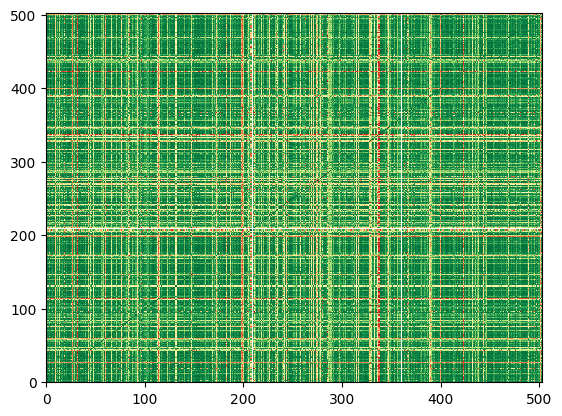

In [8]:
def visualize_data():
  df = pd.read_csv('sp500_joined_close.csv')
  # df['AAPL'].plot()
  df_corr = df.corr()
  print(df_corr.head())

  data = df_corr.values
  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)

  heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)


visualize_data()

In [9]:
# !rm -r /content/stock_dfs